In [1]:
import requests
import geopandas as gpd
import json



In [2]:
def getPayload(lon, lat, numpts, res):
    payload = {"inputs":
               [
                    {
                        "id": "lat",
                        "type": "text/plain",
                        "value": lat
                    },
                    {
                        "id": "lon",
                        "type": "text/plain",
                        "value": lon
                    },
                    {
                        "id": "numpts",
                        "type": "text/plain",
                        "value": f'{numpts}'
                    },
                    {
                        "id": "3dep_res",
                        "type": "text/plain",
                        "value": f'{res}'
                    }
                ]
               }
    return payload


In [3]:
payload = getPayload(lon=[-103.801086, -103.80097],
                     lat=[40.26772, 40.270568],
                     numpts=101,
                     res=1)
URL = "https://labs.dev-wma.chs.usgs.gov/pygeoapi/processes/nldi-xsatendpts/jobs?response=raw"


In [4]:
resp = requests.post(URL, json=payload)


In [5]:
# save as geojson file
with open('test.geojson', 'w') as f:
    json.dump(resp.json()["outputs"], f)
f.close()


In [6]:
gdf = gpd.GeoDataFrame.from_features(resp.json().get('outputs'))

<AxesSubplot:>

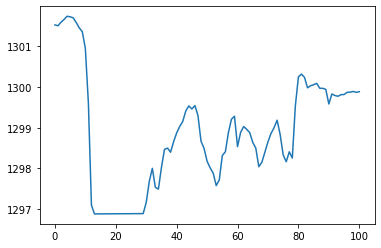

In [7]:
%matplotlib inline
gdf.elevation.plot()